In [37]:
from random import shuffle, randrange
import sys

class TooDeep(Exception):
    pass

def print_maze(hor, ver):
    s = ""
    for (a, b) in zip(hor, ver):
        i = ''.join(a + ['\n'] + b + ['\n'])
        s += i
    return s


def make_maze(w = 10, h = 10):

    # Vis is a 2D array to keep track of visited cells
    # It is the same size as the maze, but with an extra row and column
    # to account for the walls. The extra row and column are all 1s
    # to represent the walls. The cells in the maze are 0s, and the cells
    # that have been visited are 1s
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)] # 1 means visited

    # These are the wall lines. Printing a maze involves printing these lines,
    # first the horizontal walls, then the vertical walls
    hor = [["+--"] * w + ['+'] for _ in range(h + 1)] # horizontal walls
    ver = [["|  "] * w + ['|'] for _ in range(h)] + [[]] # vertical walls
    
    log = []

    def walk(x, y, l=0):


        vis[y][x] = 1 # mark as visited

        d = [(x - 1, y, '1<'), (x, y + 1, '2v'), (x + 1, y, '3>'), (x, y - 1, '4^')] # directions

        #shuffle(d) # randomize the order of directions

        # From the cell (x,y), walk to the next cell in the list d, 
        # which is the all of the cells N, S, E and W of the current cell
        for (xx, yy, cd) in d:

            if vis[yy][xx]: 
                log.append(f"{l:03} {cd}  {x,y} {xx,yy} vis={vis[yy][xx]}")
                continue # if visited, skip

            # The max(x,xx) and max(y,yy) are used to determine the hor
            # or ver array to use. You always one the larger value, because
            # the walls are always to the right or below the cell. 

            if xx == x: # Same column, so this is the N or S direction from (x,y)
                log.append( f"{l:03} {cd} H {x,y} {xx,yy} maxy={max(x, xx)}")
                hor[max(y, yy)][x] = f"+{cd[1]} " # if horizontal, then change the horizontal wall to space

            if yy == y: # Same row, so this is the E or W direction (from (x,y)
                log.append( f"{l:03} {cd} V {x,y} {xx,yy} maxy={max(y, yy)}")
                ver[y][max(x, xx)] = f" {cd[1]} " # if vertical, then change the vertical wall to space

            walk(xx, yy, l+1)

    #walk(randrange(w), randrange(h))
    try:
        walk(0, 0)
    except TooDeep as e:
        pass

    print('\n'.join(sorted(log)))

    return print_maze(hor, ver)



if __name__ == '__main__':

    print(make_maze())


000 1<  (0, 0) (-1, 0) vis=1
000 2v H (0, 0) (0, 1) maxy=0
001 1<  (0, 1) (-1, 1) vis=1
001 2v H (0, 1) (0, 2) maxy=0
002 1<  (0, 2) (-1, 2) vis=1
002 2v H (0, 2) (0, 3) maxy=0
003 1<  (0, 3) (-1, 3) vis=1
003 2v H (0, 3) (0, 4) maxy=0
004 1<  (0, 4) (-1, 4) vis=1
004 2v H (0, 4) (0, 5) maxy=0
005 1<  (0, 5) (-1, 5) vis=1
005 2v H (0, 5) (0, 6) maxy=0
006 1<  (0, 6) (-1, 6) vis=1
006 2v H (0, 6) (0, 7) maxy=0
007 1<  (0, 7) (-1, 7) vis=1
007 2v H (0, 7) (0, 8) maxy=0
008 1<  (0, 8) (-1, 8) vis=1
008 2v H (0, 8) (0, 9) maxy=0
009 1<  (0, 9) (-1, 9) vis=1
009 2v  (0, 9) (0, 10) vis=1
009 3> V (0, 9) (1, 9) maxy=9
010 1<  (1, 9) (0, 9) vis=1
010 2v  (1, 9) (1, 10) vis=1
010 3> V (1, 9) (2, 9) maxy=9
011 1<  (2, 9) (1, 9) vis=1
011 2v  (2, 9) (2, 10) vis=1
011 3> V (2, 9) (3, 9) maxy=9
012 1<  (3, 9) (2, 9) vis=1
012 2v  (3, 9) (3, 10) vis=1
012 3> V (3, 9) (4, 9) maxy=9
013 1<  (4, 9) (3, 9) vis=1
013 2v  (4, 9) (4, 10) vis=1
013 3> V (4, 9) (5, 9) maxy=9
014 1<  (5, 9) (4, 9) vis=1
014 2

(30, 15) (0, 23)


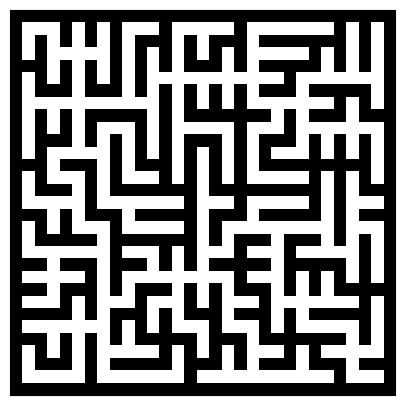

In [50]:
from mazelib import Maze
from mazelib.generate.Prims import Prims
import matplotlib.pyplot as plt

m = Maze()
m.generator = Prims(15, 15)
m.generate()
m.generate_entrances()
print(m.start, m.end)

def show(grid):
    """Generate a simple image of the maze."""
    plt.figure(figsize=(10, 5))
    plt.imshow(grid, cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
    plt.show()

show(m.grid)

In [44]:
m.grid.shape

(31, 31)